#  Chapter 3 - Fine-tuning your model

## Machine learning with scikit-learn

Having trained models, now you will learn how to evaluate them. In this chapter, you will be introduced to several metrics along with a visualization technique for analyzing classification model performance using `scikit-learn`. You will also learn how to optimize classification and regression models through the use of hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## How good is your model?

Classification metrics 
- Measuring model performance with accuracy:
- Fraction of correctly classified samples
- Not always a useful metric

Class imbalance
- Classi,cation for predicting fraudulent bank transactions
    - 99% of transactions are legitimate; 1% are fraudulent

- Could build a classi,er that predicts NONE of the transactions are fraudulent
    - 99% accurate!
    - But terrible at actually predicting fraudulent transactions
    - Fails at its original purpose

- Class imbalance: Uneven frequency of classes
- Need a different way to assess performance

![](./images/metrics1.png)

![](./images/metrics2.png)

![](./images/metrics3.png)

![](./images/metrics4.png)



In [2]:
churn_df = pd.read_csv('./datasets/telecom_churn_clean.csv',index_col=0)
display(churn_df.head())
display(churn_df.info())

X = churn_df.drop(['churn'], axis=1).values
y = churn_df["churn"].values
print(X.shape, y.shape)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

None

(3333, 18) (3333,)


### Let's see the Confusion Matrix.

In [3]:
# Confusion matrix in scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

(1999, 18) (1999,)
[[1126   12]
 [ 158   38]]


In [4]:
# Classification report in scikit-learn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1138
           1       0.76      0.19      0.31       196

    accuracy                           0.87      1334
   macro avg       0.82      0.59      0.62      1334
weighted avg       0.86      0.87      0.84      1334




### Deciding on a primary metric

Deciding on a primary metric
As you have seen, several metrics can be useful to evaluate the performance of classification models, including **accuracy**, **precision**, **recall**, and **F1-score**.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

> Answer: A model predicting if a customer is a high-value lead for a sales team with limited capacity.

With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.


### Assessing a diabetes prediction classifier

In this chapter you'll work with the `diabetes_df` dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into `X_train`, `X_test`, `y_train`, and `y_test`. In addition, a `KNeighborsClassifier()` has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a **confusion matrix** and **classification report**.

Instructions:
- Import `confusion_matrix` and `classification_report`.
- Fit the model to the training data.
- Predict the labels of the test set, storing the results as `y_pred`.
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.


In [5]:
df = pd.read_csv('./datasets/diabetes_clean.csv', index_col=None)
display(df.head())

# diabetes_df = df.loc[(df['glucose'] != 0) & (df['bmi'] != 0)].copy()
diabetes_df = df.copy()

X = diabetes_df[["bmi", "age"]].values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(537, 2) (537,)


In [6]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



The model produced 116  true positives, 33 true negatives, 35 false negatives, and 47 false positives. The classification report shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Logistic regression and the ROC curve

Logistic regression for binary classification

- Logistic regression is used for classi,cation problems
- Logistic regression outputs probabilities
-  If the probability, p > 0.5:
    - The data is labeled 1
- If the probability, p < 0.5:
    -  The data is labeled 0

![](./images/logreg1.png)



In [7]:
X = churn_df.copy().drop(['churn'], axis=1).values
y = churn_df["churn"].values

In [8]:
# Logistic regression in scikit-learn
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Predicting probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.2139224205164852


Probability thresholds
- By default, logistic regression threshold = 0.5
- Not speci,c to logistic regression
    - KNN classi,ers also have thresholds
- What happens if we vary the threshold?


ROC curve

![](./images/roc_curve.png)

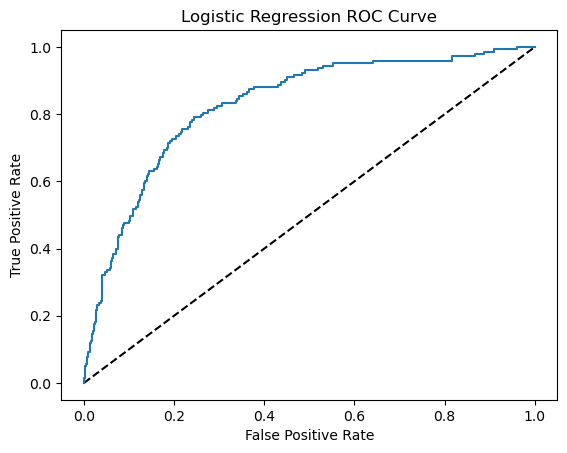

In [9]:
# Plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

pretty good, AUC is 82%.

### Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the `diabetes_df` dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The `diabetes_df` dataset has been split into `X_train`, `X_test`, `y_train`, and `y_test`, and preloaded for you.

Instructions:
- Import `LogisticRegression`.
- Instantiate a logistic regression model, `logreg`.
- Fit the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as `y_pred_probs`.


In [10]:
X = diabetes_df.drop(['diabetes'], axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

(537, 8) (537,)


In [11]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression( max_iter=10000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)

print(sorted(y_pred_probs[:10]))

[0.013293169893844438, 0.12366542592757859, 0.14572051881406864, 0.19019198488936273, 0.2666524342850851, 0.45337560095687934, 0.5046132180466912, 0.5632749752664934, 0.5963524371410169, 0.7999280078157652]


Nicely done! Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

### The ROC curve

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, `y_test`, and the predicted probabilities of the test features belonging to the positive class, `y_pred_probs`, have been preloaded for you, along with `matplotlib.pyplot as plt`.

You will create a ROC curve and then interpret the results.

Instructions:
- Import `roc_curve`.
- Calculate the ROC curve values, using `y_test` and `y_pred_probs`, and unpacking the results into `fpr`, `tpr`, and thresholds.
- Plot true positive rate against false positive rate.


In [13]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.7963576158940396


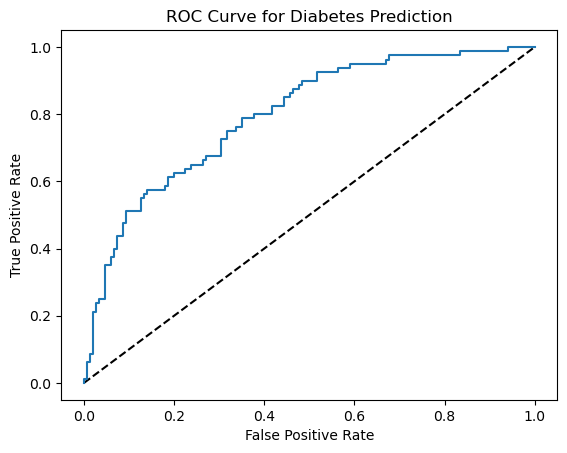

In [14]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

Question:
Well done on producing the ROC curve for the diabetes prediction model.
But, what does the plot tell you about the model's performance?

Possible Answers:

- The model is about as good as randomly guessing the class of each observation.

- The model is much worse than randomly guessing the class of each observation.

- The model is much better than randomly guessing the class of each observation.

- It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.

> Ans: The model is much better than randomly guessing the class of each observation.

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation. (AUC value is 0.796523178807947, which is pretty good)

### ROC AUC

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the `logreg` model you previously built, plus `X_train`, `X_test`, `y_train`, `y_test`. Also, the model's predicted test set labels are stored as `y_pred`, and probabilities of test set observations belonging to the positive class stored as `y_pred_probs`.

A `knn` model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and `classification_report` between the two models.

Instructions:
- Import `roc_auc_score`.
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call `classification_report()`.

In [15]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7963576158940396
[[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.7965 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## Hyperparameter tuning

### Hyperparameter tuning

- Ridge/lasso regression: Choosing ```alpha```
- KNN: Choosing ```n_neighbors```
- Hyperparameters: Parameters we specify before fitting the model
    - Like alpha and ```n_neighbors```

### Choosing the correct hyperparameters:
1. Try lots of di(erent hyperparameter values
2. Fit all of them separately
3. See how well they perform
4. Choose the best performing values


- This is called hyperparameter tuning
- It is essential to use cross-validation to avoid over,2ing to the test set
- We can still split the data and perform cross-validation on the training set
- We withhold the test set for ,nal evaluation

![](./images/grid_search.png)



In [16]:
sales_df = pd.read_csv('./datasets/advertising_and_sales_clean.csv', index_col=None)
display(sales_df.head())


# Create X from the radio column's values (.values to make sure they are numpy array)
X = sales_df[['radio','social_media']].values

# Create y from the sales column's values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [17]:
# GridSearchCV in scikit-learn
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {  "alpha": np.arange(0.0001, 1, 10),
                "solver": ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.750458310995676


In [18]:
# Evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.7608817222332331


Limitations of ```GridSearchCV```:
- 3-fold cross-validation, 1 hyperparameter, 10 total values = 30 ,ts
- 10 fold cross-validation, 3 hyperparameters, 30 total values = 900 ,ts

An alternative approach ```RandomizedSearchCV```

In [19]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
"solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.750458310995676


In [20]:
# Evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.7608817222332331


### Hyperparameter tuning with GridSearchCV

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you. A `KFold()` object has been created and stored for you as `kf`, along with a lasso regression model as `lasso`.

Instructions:
- Import `GridSearchCV`.
- Set up a parameter grid for "alpha", using `np.linspace()` to create 20 evenly spaced values ranging from 0.00001 to 1.
- Call `GridSearchCV()`, passing lasso, the parameter grid, and setting cv equal to kf.
- Fit the grid search object to the training data to perform a cross-validated grid search.


In [21]:
X = diabetes_df.drop(["glucose"], axis=1).values
y = diabetes_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(614, 8) (614,)


In [22]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.33078807238121977


Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

### Hyperparameter tuning with RandomizedSearchCV


As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

Instructions:
- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
- Fit logreg_cv to the training data.
- Print the model's best parameters and accuracy score.

In [23]:
X = diabetes_df.drop(["diabetes"], axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(614, 8) (614,)


In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

log_reg = LogisticRegression(solver='liblinear',max_iter=10000)
# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(log_reg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.12253673469387756, 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.41224489795918373}
Tuned Logistic Regression Best Accuracy Score: 0.7362121817939491


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.